# 1. Capstone2 (Data Wrangling)<a id='2.1_Contents'></a>
1. Data imports
2. Data loading
3. Data definition and preparation

## Data imports

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from termcolor import colored

## Data loading

In [2]:
os.chdir(r"C:\Springboard_Materials\Capstone 2\data")
print(os.listdir())

['BTC-USD.csv', 'CPI.csv', 'Gold.csv', 'S&P500.csv']


In [3]:
bitcoin_prices=pd.read_csv(r"BTC-USD.csv", index_col=['Date'], parse_dates=['Date'])
display(bitcoin_prices.head())
print(bitcoin_prices.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008.0
2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992.0
2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000.0
2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984.0
2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2191 entries, 2017-01-01 to 2022-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2191 non-null   float64
 1   High       2191 non-null   float64
 2   Low        2191 non-null   float64
 3   Close      2191 non-null   float64
 4   Adj Close  2191 non-null   float64
 5   Volume     2191 non-null   float64
dtypes: float64(6)
memory usage: 119.8 KB
None


In [4]:
sp500_prices=pd.read_csv(r"S&P500.csv", parse_dates=['Date'], index_col=['Date'])
display(sp500_prices.head())
print(sp500_prices.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,"2,251.57","2,263.88","2,245.13","2,257.83","2,257.83","3,773,010,000"
2017-01-04,"2,261.60","2,272.82","2,261.60","2,270.75","2,270.75","3,768,890,000"
2017-01-05,"2,268.18","2,271.50","2,260.45","2,269.00","2,269.00","3,785,080,000"
2017-01-06,"2,271.14","2,282.10","2,264.06","2,276.98","2,276.98","3,342,080,000"
2017-01-09,"2,273.59","2,275.49","2,268.90","2,268.90","2,268.90","3,219,730,000"


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-03 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       1509 non-null   object
 1   High       1509 non-null   object
 2   Low        1509 non-null   object
 3   Close      1509 non-null   object
 4   Adj Close  1509 non-null   object
 5   Volume     1509 non-null   object
dtypes: object(6)
memory usage: 82.5+ KB
None


In [5]:
sp500_prices.replace(',', '', regex=True, inplace=True)

In [6]:
# All data should be numeric
for col in sp500_prices.columns:
    sp500_prices[col]=sp500_prices[col].astype('float64')
sp500_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-03 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1509 non-null   float64
 1   High       1509 non-null   float64
 2   Low        1509 non-null   float64
 3   Close      1509 non-null   float64
 4   Adj Close  1509 non-null   float64
 5   Volume     1509 non-null   float64
dtypes: float64(6)
memory usage: 82.5 KB


In [7]:
cpi=pd.read_csv(r"CPI.csv", header=1)
cpi.dropna(axis=1, how='all', inplace=True)
cpi.drop(['Dec-Dec', 'Avg-Avg', 'Avg'], axis=1, inplace=True)
display(cpi.head())

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
0,1913,9.8,9.8,9.8,9.8,9.7,9.8,9.9,9.9,10.0,10.0,10.1,10.0
1,1914,10.0,9.9,9.9,9.8,9.9,9.9,10.0,10.2,10.2,10.1,10.2,10.1
2,1915,10.1,10.0,9.9,10.0,10.1,10.1,10.1,10.1,10.1,10.2,10.3,10.3
3,1916,10.4,10.4,10.5,10.6,10.7,10.8,10.8,10.9,11.1,11.3,11.5,11.6
4,1917,11.7,12.0,12.0,12.6,12.8,13.0,12.8,13.0,13.3,13.5,13.5,13.7


In [8]:
cpi=cpi.loc[np.logical_and(cpi.Year>2016, cpi.Year<2023)]
cpi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 104 to 109
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6 non-null      int64  
 1   Jan     6 non-null      float64
 2   Feb     6 non-null      object 
 3   Mar     6 non-null      float64
 4   Apr     6 non-null      float64
 5   May     6 non-null      float64
 6   June    6 non-null      float64
 7   July    6 non-null      float64
 8   Aug     6 non-null      float64
 9   Sep     6 non-null      float64
 10  Oct     6 non-null      float64
 11  Nov     6 non-null      float64
 12  Dec     6 non-null      float64
dtypes: float64(11), int64(1), object(1)
memory usage: 672.0+ bytes


In [9]:
cpi.Feb=cpi.Feb.astype('float64')

In [10]:
cpi=cpi.melt(id_vars='Year', var_name='Month', value_name='cpi')

In [11]:
cpi.Year=cpi.Year.astype(str)
cpi['Date']=cpi.Month+" "+cpi.Year
cpi.drop(['Year', 'Month'], axis=1, inplace=True)
cpi['Date']= pd.to_datetime(cpi.Date)
cpi.set_index('Date', inplace=True)
display(cpi.head())
print(cpi.info())

,cpi
Date,
2017-01-01,242.839
2018-01-01,247.867
2019-01-01,251.712
2020-01-01,257.971
2021-01-01,261.582


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cpi     72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB
None


In [12]:
gold=pd.read_csv(r"Gold.csv",parse_dates=['Date'], index_col=['Date']).sort_index()
gold.columns=bitcoin_prices.columns
display(gold.head())
print(gold.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,"1,155.20","1,160.80","1,146.50","1,160.40","1,160.40",52
2017-01-04,"1,156.30","1,165.00","1,156.30","1,163.80","1,163.80",36
2017-01-05,"1,172.00","1,183.30","1,171.50","1,179.70","1,179.70",500
2017-01-06,"1,176.50","1,176.50","1,171.90","1,171.90","1,171.90",16
2017-01-09,"1,173.90","1,183.60","1,173.00","1,183.50","1,183.50",62


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Open       1516 non-null   object
 1   High       1516 non-null   object
 2   Low        1516 non-null   object
 3   Close      1516 non-null   object
 4   Adj Close  1516 non-null   object
 5   Volume     1516 non-null   object
dtypes: object(6)
memory usage: 82.9+ KB
None


In [13]:
gold.replace(',', '', regex=True, inplace=True)
gold.replace('-', np.nan, regex=True, inplace=True)

In [14]:
gold

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1155.20,1160.80,1146.50,1160.40,1160.40,52
2017-01-04,1156.30,1165.00,1156.30,1163.80,1163.80,36
2017-01-05,1172.00,1183.30,1171.50,1179.70,1179.70,500
2017-01-06,1176.50,1176.50,1171.90,1171.90,1171.90,16
2017-01-09,1173.90,1183.60,1173.00,1183.50,1183.50,62
...,...,...,...,...,...,...
2022-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-27,1803.40,1826.30,1803.40,1814.80,1814.80,69
2022-12-28,1803.20,1807.90,1803.10,1807.90,1807.90,434


In [15]:
for col in gold.columns:
    gold[col]=gold[col].astype('float64')
print(gold.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1516 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1480 non-null   float64
dtypes: float64(6)
memory usage: 82.9 KB
None


In [16]:
gold_m=gold.resample('M').last()
display(gold_m.head())
print(gold_m.info())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,1194.9,1214.7,1193.5,1208.6,1208.6,3212.0
2017-02-28,1253.6,1257.3,1247.2,1252.6,1252.6,721.0
2017-03-31,1242.1,1248.8,1238.7,1247.3,1247.3,8223.0
2017-04-30,1268.7,1269.3,1253.3,1253.3,1253.3,34.0
2017-05-31,1268.0,1269.2,1260.8,1267.0,1267.0,825.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-31 to 2022-12-31
Freq: M
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       72 non-null     float64
 1   High       72 non-null     float64
 2   Low        72 non-null     float64
 3   Close      72 non-null     float64
 4   Adj Close  72 non-null     float64
 5   Volume     72 non-null     float64
dtypes: float64(6)
memory usage: 3.9 KB
None


## Data definition and preparation

#### Note: We have daily bitcoin, and S&P500 data. While we have monthly inflation and gold data
A check of the data source shows that CPI refers to prior month's inflation index (e.g. 2021-11-01 is October's data point). 

In [17]:
daily_data=sp500_prices.merge(bitcoin_prices, left_index=True, right_index=True, suffixes=['_sp500', '_btc'])

In [18]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2017-01-03 to 2022-12-29
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open_sp500       1509 non-null   float64
 1   High_sp500       1509 non-null   float64
 2   Low_sp500        1509 non-null   float64
 3   Close_sp500      1509 non-null   float64
 4   Adj Close_sp500  1509 non-null   float64
 5   Volume_sp500     1509 non-null   float64
 6   Open_btc         1509 non-null   float64
 7   High_btc         1509 non-null   float64
 8   Low_btc          1509 non-null   float64
 9   Close_btc        1509 non-null   float64
 10  Adj Close_btc    1509 non-null   float64
 11  Volume_btc       1509 non-null   float64
dtypes: float64(12)
memory usage: 153.3 KB


In [19]:
cpi.sort_index(inplace=True)

In [20]:
monthly_data=pd.merge_asof(gold_m, cpi, left_index=True, right_index=True, direction='nearest')

In [21]:
monthly_data.head()

,Open,High,Low,Close,Adj Close,Volume,cpi
Date,,,,,,,
2017-01-31,1194.9,1214.7,1193.5,1208.6,1208.6,3212.0,243.603
2017-02-28,1253.6,1257.3,1247.2,1252.6,1252.6,721.0,243.801
2017-03-31,1242.1,1248.8,1238.7,1247.3,1247.3,8223.0,244.524
2017-04-30,1268.7,1269.3,1253.3,1253.3,1253.3,34.0,244.733
2017-05-31,1268.0,1269.2,1260.8,1267.0,1267.0,825.0,244.955


#### We only need the adjusted Close data

In [22]:
daily_data=daily_data[['Adj Close_sp500', 'Adj Close_btc']]
monthly_data=monthly_data[['Adj Close', 'cpi']]
monthly_data.rename(columns={'Adj Close': 'Adj Close_gold'}, inplace=True)

# 2. Capstone2 (Exploratory Data Analysis)

In [23]:
# Convert daily data to monthly
daily_data_to_m=daily_data.resample('M').last()

In [24]:
print(daily_data_to_m.info(), '\n')
print(monthly_data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-31 to 2022-12-31
Freq: M
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Adj Close_sp500  72 non-null     float64
 1   Adj Close_btc    72 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2017-01-31 to 2022-12-31
Freq: M
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_gold  72 non-null     float64
 1   cpi             72 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB
None


In [25]:
monthly_data=monthly_data.merge(daily_data_to_m, how='inner', left_index=True, right_index=True)

In [26]:
monthly_data.head()

,Adj Close_gold,cpi,Adj Close_sp500,Adj Close_btc
Date,,,,
2017-01-31,1208.6,243.603,2278.87,970.403015
2017-02-28,1252.6,243.801,2363.64,1179.969971
2017-03-31,1247.3,244.524,2362.72,1071.790039
2017-04-30,1253.3,244.733,2384.20,1316.479980
2017-05-31,1267.0,244.955,2411.80,2286.409912


## 2.1 Initial Analysis

In [27]:
#Calculate standardized return indices
monthly_data_std=monthly_data*100/monthly_data.iloc[0]
monthly_data_std.head()

# Remove the inflation data from comparison analysis
monthly_data_inf=monthly_data.copy()
monthly_data.drop('cpi', axis=1, inplace=True)

In [28]:
plt.style.use('ggplot')

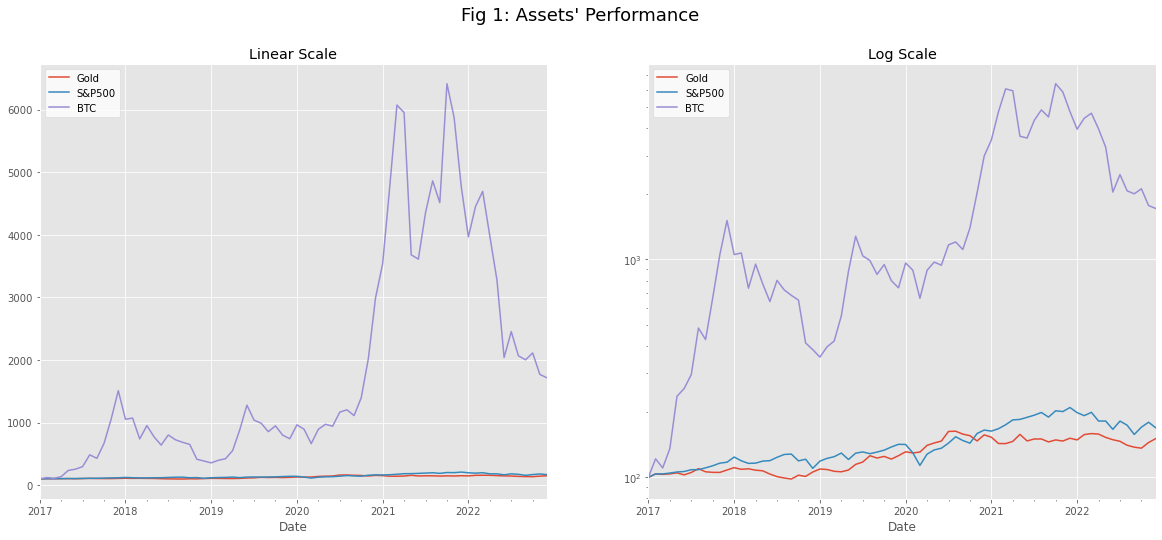

In [29]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

monthly_data_std[['Adj Close_gold', 'Adj Close_sp500', 'Adj Close_btc']].plot(ax=ax[0])
ax[0].set_title('Linear Scale')
ax[0].legend(['Gold', 'S&P500', 'BTC'], facecolor='white', loc=2)

monthly_data_std[['Adj Close_gold', 'Adj Close_sp500', 'Adj Close_btc']].plot(ax=ax[1], logy=True)
ax[1].set_title('Log Scale')
ax[1].legend(['Gold', 'S&P500', 'BTC'], facecolor='white', loc=2)

plt.suptitle("Fig 1: Assets' Performance", size=18)

plt.show()

### Finding 1:
Figure 1 shows the strong outperformance of BTC over the investigated period. Figure 1 also shows that S&P500 performed better than Gold, overall, throughout the investigated period.

## 2.2 Comparison of Asset Returns

### Monthly returns

In [30]:
monthly_returns=monthly_data.pct_change().dropna()
monthly_returns.columns=['Gold', 'SP500', 'BTC']

In order to analyze the probability of outliers in returns, it is helpful to visualize the historical returns using a histogram

#### Distribution of monthly returns

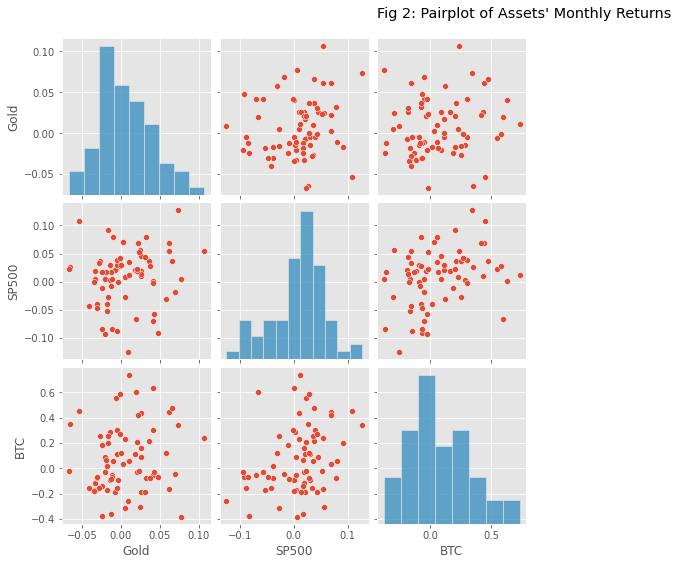

In [139]:
sns.pairplot(monthly_returns, diag_kind='hist')
plt.title("Fig 2: Pairplot of Assets' Monthly Returns", loc='left', pad=350)
plt.show()

In [32]:
# Measure the Skewness
print('Skewness', '\n', monthly_returns.skew(), '\n')

# Measure the Kurtosis
print('Kurtosis','\n', monthly_returns.kurtosis(), '\n')

# Normality test
from scipy.stats import shapiro
monthly_returns

print(f"The normality test result for gold is {shapiro(monthly_returns['Gold'])}")
print(f"The normality test result for s&p500 is {shapiro(monthly_returns['SP500'])}")
print(f"The normality test result for btc is {shapiro(monthly_returns['BTC'])}")
print('\n')
print("The p-values show that among the three assets only the distribution of Bitcoin's monthly return is non-normal")

Skewness 
 Gold     0.445596
SP500   -0.454930
BTC      0.534677
dtype: float64 

Kurtosis 
 Gold     0.075932
SP500    0.311811
BTC     -0.289172
dtype: float64 

The normality test result for gold is ShapiroResult(statistic=0.977425754070282, pvalue=0.22935746610164642)
The normality test result for s&p500 is ShapiroResult(statistic=0.9672618508338928, pvalue=0.060571566224098206)
The normality test result for btc is ShapiroResult(statistic=0.9638887643814087, pvalue=0.03891528397798538)


The p-values show that among the three assets only the distribution of Bitcoin's monthly return is non-normal


### Annualized total returns

In [33]:
# Calculate period performance
total_return= (monthly_data.iloc[-1]-monthly_data.iloc[0])/monthly_data.iloc[0]
total_return.index=['Gold', 'SP500', 'BTC']
print(total_return, '\n')

# Annualized total returns
annualized_return=((1+total_return)**(12/len(monthly_returns)))-1
annualized_return.index=['Gold', 'SP500', 'BTC']
display(annualized_return)

Gold      0.505626
SP500     0.689118
BTC      16.149928
dtype: float64 



Gold     0.071610
SP500    0.092642
BTC      0.616619
dtype: float64

### Comparison of asset returns

In [34]:
# Annual dataframe for performance comparison
annual_data=monthly_data.resample('Y').last()
annual_return=annual_data.pct_change().mul(100).iloc[1:]

In [35]:
# Plot them
annual_return_long=annual_return.melt(var_name='asset', value_name='return', ignore_index=False)
annual_return_long['year']=annual_return_long.index.year
annual_return_long.reset_index(inplace=True, drop=True)
annual_return_long.asset.replace({'Adj Close_gold':'Gold', 'Adj Close_btc': 'BTC', 'Adj Close_sp500': 'S&P500'}, inplace=True)
annual_return_long.head()

,asset,return,year
0,Gold,-2.143459,2018
1,Gold,18.868810,2019
2,Gold,24.587035,2020
3,Gold,-3.465216,2021
4,Gold,-0.426813,2022


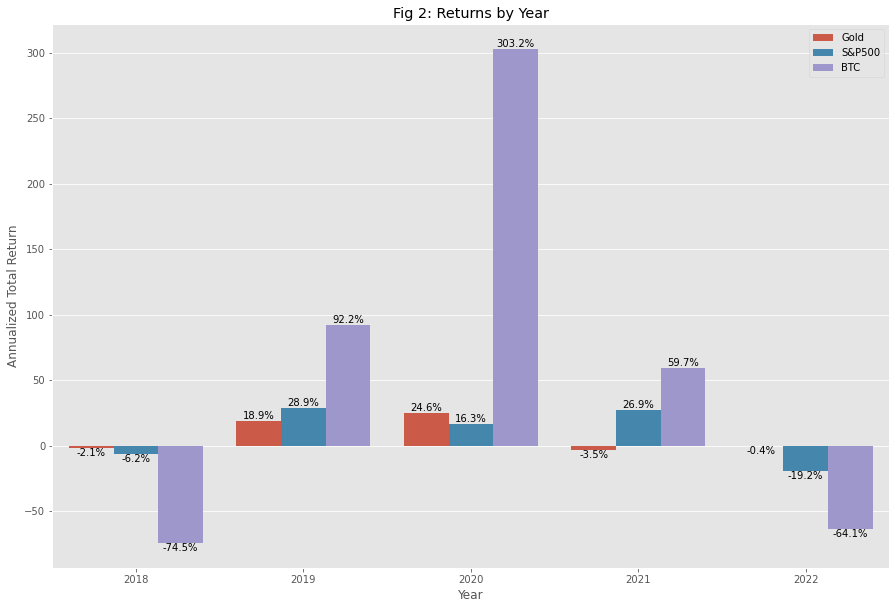

In [36]:
fig, ax=plt.subplots(figsize=(15, 10))
sns.barplot(data=annual_return_long, x='year', y='return', hue='asset', ax=ax)
ax.bar_label(ax.containers[0], fmt='%.1f%%')
ax.bar_label(ax.containers[1], fmt='%.1f%%')
ax.bar_label(ax.containers[2], fmt='%.1f%%')
plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Annualized Total Return')
ax.set_title('Fig 3: Returns by Year')
plt.show()

### Finding 2:
As can be seen in Figure 2, BTC outperfored in 2019, 2020, and 2021. On the other hand, BTC had losed a lot in 2018 and 2022

## 2.3 Risks and volatilities

#### 1. Sharpe Ratio

In [37]:
# Calculate the standard deviation and sharpe ratio
# We perform it based on the monthly return
monthly_returns_std_annualized=monthly_returns.std()*np.sqrt(12)
print(monthly_returns_std_annualized)
print('\n')

# Calculate the Sharpe ratio by considering the risk free rate to be 0
assets_sharpe=annualized_return/monthly_returns_std_annualized
print(colored('Sharpe Ratios', color='blue', attrs=['bold']))
print(assets_sharpe)

Gold     0.120892
SP500    0.172261
BTC      0.902199
dtype: float64


Sharpe Ratios
Gold     0.592344
SP500    0.537799
BTC      0.683462
dtype: float64


### Finding 3.1:
The risk-adjusted return, as measured by Sharpe ratio, shows that it is worth the risk to invest on BTC.

#### 2. Maximum drawdown

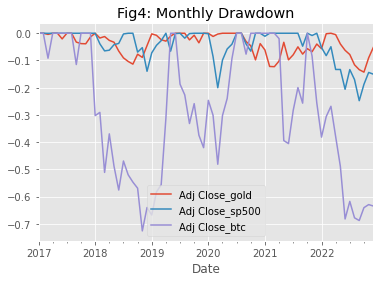

Max monthly drawdown
Adj Close_gold    -0.142827
Adj Close_sp500   -0.247695
Adj Close_btc     -0.725900
dtype: float64


In [141]:
# Calculate the Maximum draw-down: The largest change from the PEAK in one month over a 12-month window
## Calculate the rolling maximum values and monthly draw-downs
roll_max=monthly_data.rolling(window=12, min_periods=1).max()
## Calculate the monthly draw-down from the rolling max
monthly_drawdown=(monthly_data-roll_max)/roll_max
## Calculate the maximum monthly draw-down
max_monthly_drawdown=monthly_drawdown.rolling(window=12, min_periods=1).min()

# plot them
monthly_drawdown.plot()
plt.title('Fig4: Monthly Drawdown')
plt.show()

print(colored('Max monthly drawdown', color='blue', attrs=['bold']))
print(monthly_drawdown.min())

### Finding 3.2:
The maximum drawdown plot shows that there was a significant difference between the monthly drawdown between the three assets, where BTC has the most significant one with around -73% and gold had the lowest with about -14%. This indicates that the investing on BTC is much riskier based on the historical data.

#### 3. Historical VaR

['Gold' 'SP500' 'BTC']
[ -3.774736    -8.60335941 -30.67302037]


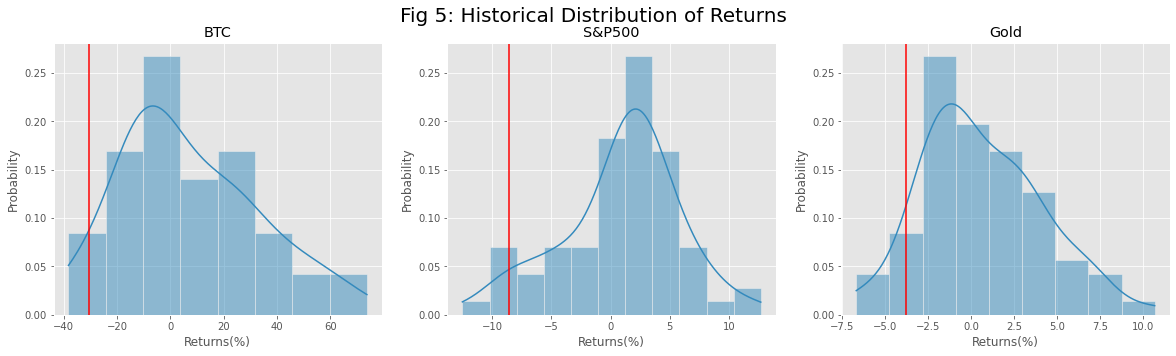

In [142]:
# Calculate the monthly returns in percent
monthly_returns_percent=monthly_returns*100
# Calculate the historical VaR(95)
var_95=np.percentile(monthly_returns_percent,5, axis=0)
print(monthly_returns_percent.columns.values)
print(var_95)

sorted_rets_btc=sorted(monthly_returns_percent['BTC'])
sorted_rets_sp500=sorted(monthly_returns_percent['SP500'])
sorted_rets_gold=sorted(monthly_returns_percent['Gold'])

fig, ax=plt.subplots(1,3, figsize=(20, 5))
sns.histplot(sorted_rets_btc, stat='probability', kde=True, ax=ax[0], label='BTC')
ax[0].axvline(x=var_95[2], color='r')
ax[0].set_title('BTC')
ax[0].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_sp500, stat='probability', kde=True, ax=ax[1], label='S&P500')
ax[1].axvline(x=var_95[1], color='r')
ax[1].set_title('S&P500')
ax[1].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_gold, stat='probability', kde=True, ax=ax[2], label='Gold')
ax[2].axvline(x=var_95[0], color='r')
ax[2].set_title('Gold')
ax[2].set_xlabel('Returns(%)')
plt.suptitle('Fig 5: Historical Distribution of Returns', size=20)
plt.show()

### Finding 3.3:
Acknowledging the shortcomings of volatility as a risk measure (e.g. it captures upside volatility as well, which might actually be desirable), we add the historic Value-at-Risk (VaR) for the 95% confidence interval: Bitcoin's VaR of -30.7% has been more than 3-times that of S&P500, and more than 8-times that of gold.

#### 4. Historical Expected Shortfall CVaR

-35.86292076705496
-9.956217434892565
-5.659114599495971


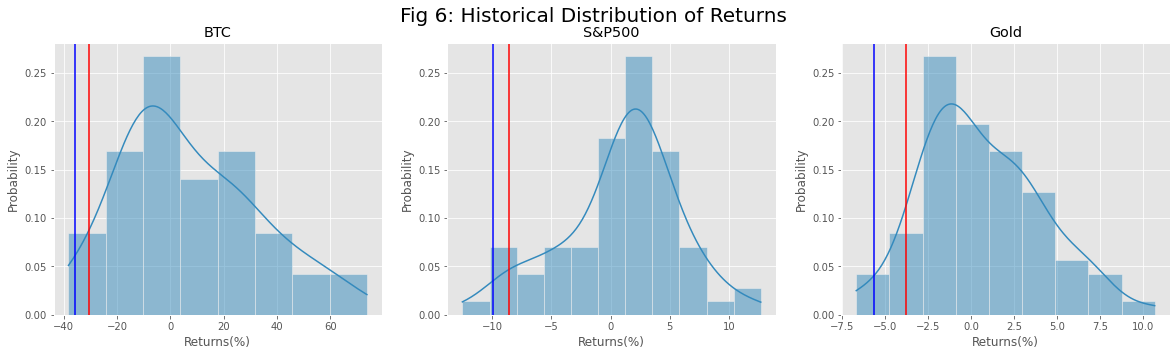

In [143]:
# Calculate CVaR(95)
cvar_95_btc=monthly_returns_percent.loc[monthly_returns_percent.BTC<np.percentile(monthly_returns_percent.BTC,5), 'BTC'].mean()
print(cvar_95_btc)

cvar_95_sp500=monthly_returns_percent.loc[monthly_returns_percent.SP500<np.percentile(monthly_returns_percent.SP500,5), 'SP500'].mean()
print(cvar_95_sp500)

cvar_95_gold=monthly_returns_percent.loc[monthly_returns_percent.Gold<np.percentile(monthly_returns_percent.Gold,5), 'Gold'].mean()
print(cvar_95_gold)

fig, ax=plt.subplots(1,3, figsize=(20, 5))
sns.histplot(sorted_rets_btc, stat='probability', kde=True, ax=ax[0], label='BTC')
ax[0].axvline(x=var_95[2], color='r')
ax[0].axvline(x=cvar_95_btc, color='b')
ax[0].set_title('BTC')
ax[0].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_sp500, stat='probability', kde=True, ax=ax[1], label='S&P500')
ax[1].axvline(x=var_95[1], color='r')
ax[1].axvline(x=cvar_95_sp500, color='b')
ax[1].set_title('S&P500')
ax[1].set_xlabel('Returns(%)')
sns.histplot(sorted_rets_gold, stat='probability', kde=True, ax=ax[2], label='Gold')
ax[2].axvline(x=var_95[0], color='r')
ax[2].axvline(x=cvar_95_gold, color='b')
ax[2].set_title('Gold')
ax[2].set_xlabel('Returns(%)')
plt.suptitle('Fig 6: Historical Distribution of Returns', size=20)
plt.show()

### Finding 3.4:
Expected shortfall measures the mean loss below the VaR and gives another indication of Bitcoin's significant tail risk: -36% for Bitcoin vs. -10% for S&P500 and -6% for gold.

#### Table

In [76]:
Stats=pd.DataFrame({'Annual return (in %)':np.round(annualized_return.values*100,1),
      'Annual volatility (in %)':np.round(monthly_returns_std_annualized.values*100,1),
      'Sharpe ratio':np.round(assets_sharpe.values,1),
      'Max. drawdown (mthly, in %)':np.round(monthly_drawdown.min().values,1),
      'VaR(95) (in %)': np.round(np.array(var_95),1),
      'CVaR(5) / Expected shortfall (in %)': np.round(np.array([cvar_95_gold,cvar_95_sp500,cvar_95_btc]),1)
      }).T
Stats.columns=['Gold', 'SP500', 'BTC']
display(Stats)

,Gold,SP500,BTC
Annual return (in %),7.2,9.3,61.7
Annual volatility (in %),12.1,17.2,90.2
Sharpe ratio,0.6,0.5,0.7
"Max. drawdown (mthly, in %)",-0.1,-0.2,-0.7
VaR(95) (in %),-3.8,-8.6,-30.7
CVaR(5) / Expected shortfall (in %),-5.7,-10.0,-35.9


### Finding 3.5:
Overall, investing on BTC comes with a higher risk compared to S&P500 and gold. But still, the Sharpe ratio shows that is is worth tp take that risk at some level.

## 2.4 Assets Correlation

,Gold,US_CPI,SP500,BTC
Gold,1.00,0.03,0.14,0.14
US_CPI,0.03,1.00,0.03,-0.02
SP500,0.14,0.03,1.00,0.32
BTC,0.14,-0.02,0.32,1.00


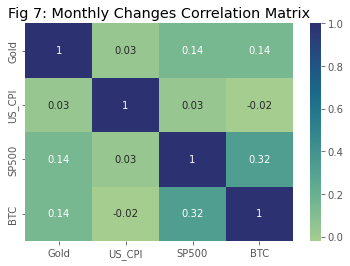

In [144]:
#Calculate correlation matrix on monthly changes
monthly_data_inf.columns=['Gold', 'US_CPI', 'SP500', 'BTC']
cor=monthly_data_inf.pct_change().corr().round(2)
display(cor)
sns.heatmap(cor, annot=True, cmap="crest")
plt.title('Fig 7: Monthly Changes Correlation Matrix')
plt.show()

C:\Users\sd694\AppData\Local\Temp/ipykernel_72500/900962103.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_xticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_72500/900962103.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_yticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_72500/900962103.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_xticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_72500/900962103.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_yticks()])
C:\Users\sd694\AppData\Local\Temp/ipykernel_72500/900962103.py:11: UserWarning: FixedFormatter should only be used together with Fix

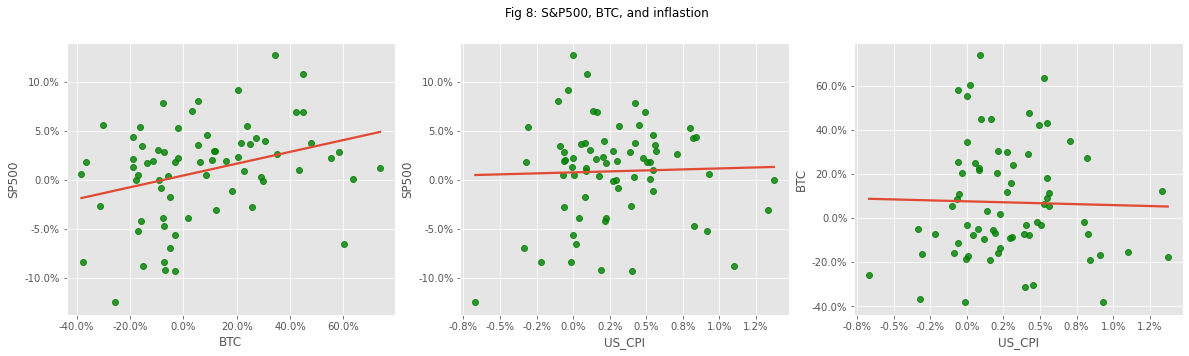

In [145]:
fig, ax=plt.subplots(1,3, figsize=(20,5))
sns.regplot(y='SP500', x='BTC', data=monthly_data_inf.pct_change()*100, ci=None, scatter_kws={'color':'green'}, ax=ax[0])
ax[0].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_xticks()])
ax[0].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[0].get_yticks()])

sns.regplot(y='SP500', x='US_CPI', data=monthly_data_inf.pct_change()*100, ci=None, scatter_kws={'color':'green'}, ax=ax[1])
ax[1].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_xticks()])
ax[1].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[1].get_yticks()])

sns.regplot(y='BTC', x='US_CPI', data=monthly_data_inf.pct_change()*100, ci=None, scatter_kws={'color':'green'}, ax=ax[2])
ax[2].set_xticklabels(['{0:.1f}%'.format(x) for x in ax[2].get_xticks()])
ax[2].set_yticklabels(['{0:.1f}%'.format(x) for x in ax[2].get_yticks()])
plt.suptitle('Fig 8: S&P500, BTC, and inflastion')

plt.show()

### Finding 4:
The scatterplot of monthly changes (right chart in figure 8) as well as the correlation coefficient of close to zero (figure 7) suggest that there has been no consistent relationship between changes in the price of Bitcoin and inflation since 2017. In itself Bitcoin does not offer good hedging properties against inflation, as it has been largely uncorrelated to changes in the general price level. It seems neither positively nor negatively affected by inflation.

It's also worth noting the positive correlation between the S&P 500 and Bitcoin. A correlation coefficient of 0.3 suggests that Bitcoin tends to move in the same direction as equities, thus offering only limited diversification benefits in a portfolio with equities.